In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pylab import rcParams
 

In [41]:
ex = pd.read_excel("dunkriver.xlsx")
ex.head()
ex= ex[["Date","Level(m)","bilstm","gru","pred_prophet"]]
ex.head()

,Date,Level(m),bilstm,gru,pred_prophet
0,2018-01-01,0.654,0.610225,0.625729,0.645525
1,2018-01-02,0.652,0.610483,0.626405,0.645322
2,2018-01-03,0.651,0.607779,0.621929,0.643633
3,2018-01-04,0.662,0.592790,0.600576,0.645447
4,2018-01-05,0.844,0.699537,0.699222,0.703258


In [46]:
x=ex["pred_prophet"]
confi = 0.2*np.std(x/np.mean(x))

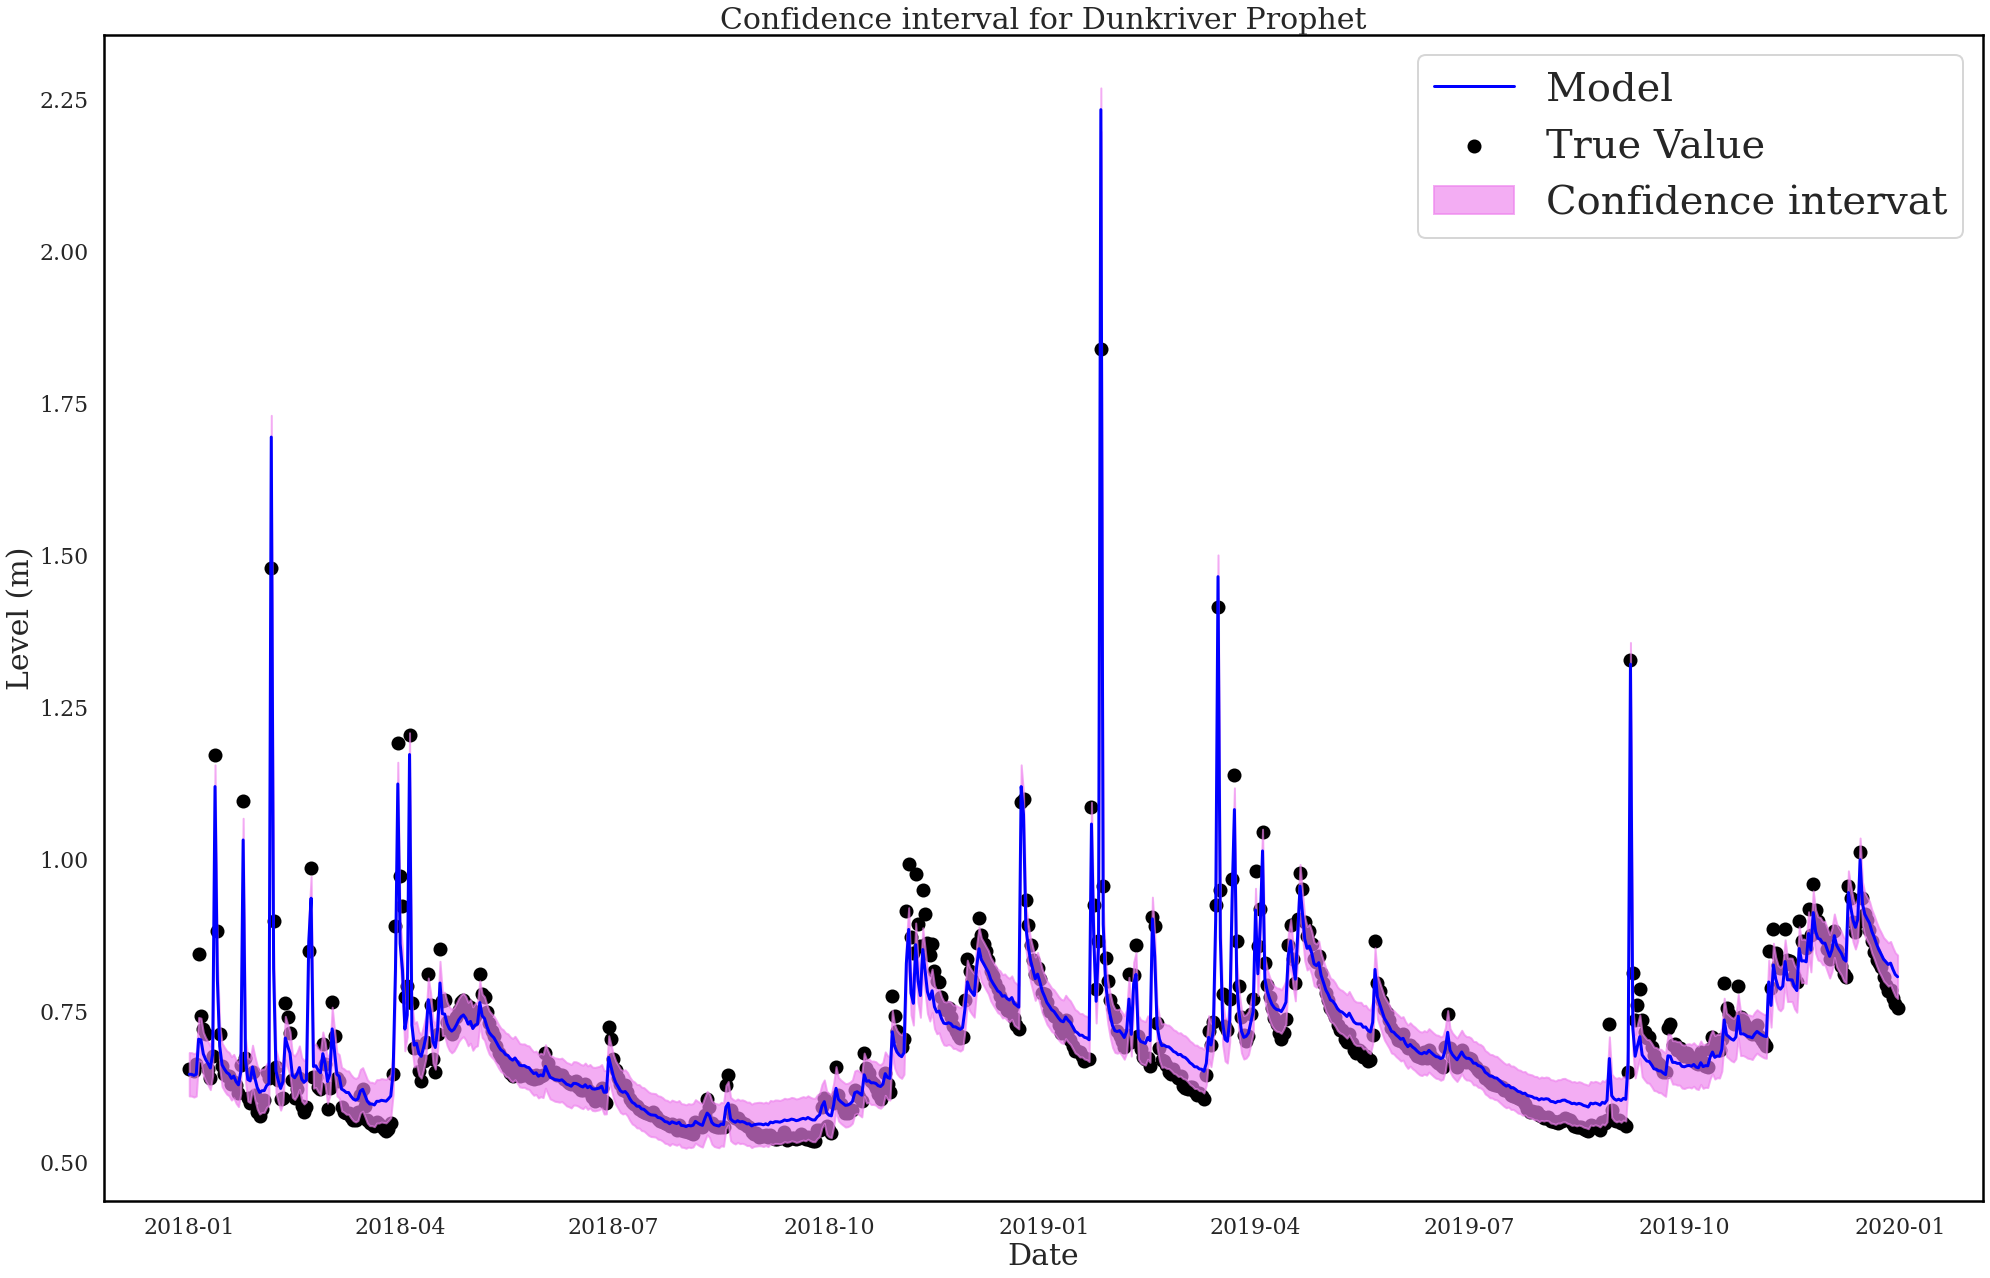

In [47]:
sns.set(rc={'axes.facecolor':'White', 'figure.facecolor':'White','axes.edgecolor': 'black'})
#plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 30,20
rcParams['font.size'] = 50
rcParams['font.family'] = "serif"
sns.set_context('poster') 
rcParams['font.size'] = 45
plt.scatter(ex["Date"], ex["Level(m)"], color='black',label="True Value")
plt.plot(ex["Date"],x , color='blue',lw='3',label="Model")
plt.fill_between(ex["Date"], (x-confi), (x+confi), color='violet', alpha=0.65,label="Confidence intervat")
plt.xlabel("Date",fontsize=30)
plt.ylabel("Level (m)",fontsize=30)
plt.title("Confidence interval for Dunkriver Prophet",fontsize=30)
plt.legend(loc=0, prop={'size': 40})
plt.show()

In [61]:
import sklearn

In [62]:

from sklearn.metrics import r2_score 

R_square = r2_score(ex["Level(m)"], ex["gru"]) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8959324312400598


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

NameError: name 'r2' is not defined

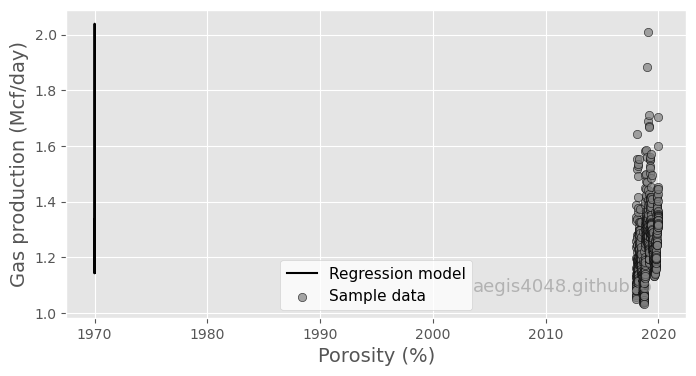

In [65]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(ex["Level(m)"], ex["gru"], color='k', label='Regression model')
ax.scatter(ex["Date"], ex["Level(m)"], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()